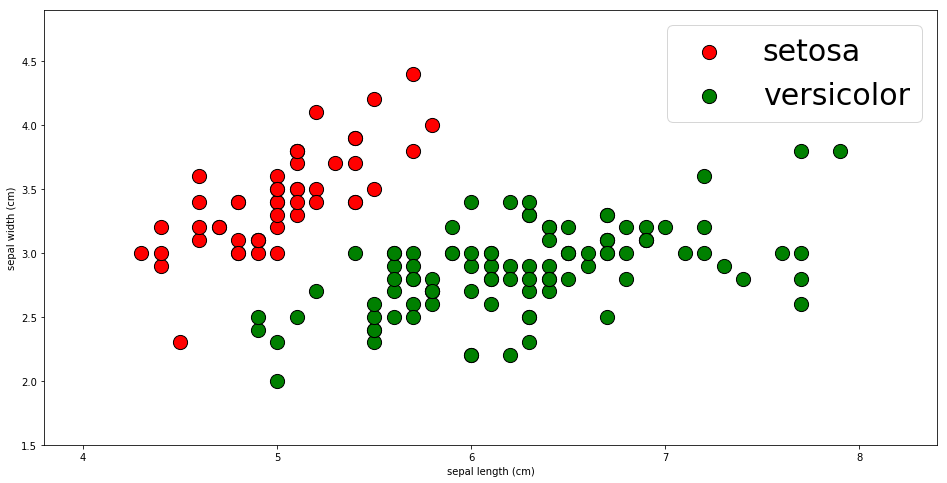

In [3]:
import matplotlib.pyplot as plt
from sklearn import datasets

%matplotlib inline

# Đọc dữ liệu iris
iris = datasets.load_iris()

# Lấy 2 đặc trưng đầu tiên (trong số 4 đặc trưng)
X = iris.data[:, :2]  

# Lấy nhãn của các mẫu
y = iris.target
y = 0*(y==0) + 1 * (y!=0)

# Lấy giá trị min, max của các đặc trưng để vẽ hình
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

# Lấy ra hệ tọa độ để vẽ
fig, ax = plt.subplots(figsize=(16, 8))

# Màu sắc của từng lớp đối tượng
color = ['red', 'green', 'blue']

# Vẽ từng lớp trong dữ liệu
for classIndex in set(y):
    # Lọc ra các mẫu thuộc vào lớp classIndex
    mask = y==classIndex
    # Lấy tên của lớp
    name = iris.target_names[classIndex]
    # Vẽ các mẫu thuộc lớp classIndex
    ax.scatter(X[mask,0], X[mask,1], c=color[classIndex], label=name, edgecolor='k', s = 200)

# đặt các thông số của đồ thị
ax.set_xlabel(iris.feature_names[0])
ax.set_ylabel(iris.feature_names[1])
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
#ax.set_xticks(())
#ax.set_yticks(())
ax.legend(fontsize=30)

# Đưa ra màn hình
plt.show()

In [ ]:
import numpy as np

def make_meshgrid(x, y, h=.02):
    """ Tạo lưới 2 chiều để vẽ 

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 0.5, x.max() + 0.5
    y_min, y_max = y.min() - 0.5, y.max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy, x_min, x_max, y_min, y_max

def plot_contours(ax, clf, xx, yy, **params):
    """ Vẽ đường các vùng ra quyết định của 1 mô hình phân lớp

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

class Logistics:
    def __init__(self):
        self.w = np.array([0.5,-0.85])
        self.w0 = -0.2
        self.eta = 0.001
        self.T = 10000
        self.lda = 0.001
        
    def predict(self, X):
        f = np.dot(X,self.w) + self.w0
        y = 1*(f>0)
        return y
    
    def fit(self, X, y):
        # dao ham voi mau i
        # Xi ( Yi - P(Y=1|Xi,w ))
        # w -> w + eta * Xi ( Yi - P(Y=1|Xi,w ))
        # w0 -> w0 + eta * ( Yi - P(Y=1|Xi,w ))
        for i in range(self.T):
            f = np.dot(X,self.w) + self.w0
            p = 1.0 / (1.0 + np.exp(-f) )
            l = np.sum( y*p + (1-y)*(1-p) )
            self.w = self.w  \
                + self.eta * np.sum( X * np.reshape(y-p, newshape=(150,1)), axis=0 )  \
                - self.lda * self.w
            self.w0 = self.w0 + self.eta * np.sum(y-p) - self.lda * self.w0
            print ("iter", i, "likelihood", l)
        

# Lấy giá trị min, max của các đặc trưng để vẽ hình
xx, yy, x_min, x_max, y_min, y_max = make_meshgrid(X[:,0], X[:,1])

# Lấy ra hệ tọa độ để vẽ
fig, ax = plt.subplots(figsize=(16, 8))

# Màu sắc của từng lớp đối tượng
color = ['red', 'green', 'blue']

logistics = Logistics()
logistics.fit(X, y);
print( logistics.w, logistics.w0 )
# Vẽ các vùng quyết định của mô hình (sau khi huấn luyện)
plot_contours(ax, logistics, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)

# Vẽ từng lớp trong dữ liệu
for classIndex in set(y):
    # Lọc ra các mẫu thuộc vào lớp classIndex
    mask = y==classIndex
    # Lấy tên của lớp
    name = iris.target_names[classIndex]
    # Vẽ các mẫu thuộc lớp classIndex
    ax.scatter(X[mask,0], X[mask,1], c=color[classIndex], label=name, edgecolor='k', s = 200)

# đặt các thông số của đồ thị
ax.set_xlabel(iris.feature_names[0])
ax.set_ylabel(iris.feature_names[1])
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
#ax.set_xticks(())
#ax.set_yticks(())
ax.legend(fontsize=30)

# Đưa ra màn hình
plt.show()

[ 3.04585631 -2.66855503  2.86740991  0.1797245  -0.33541682] -0.293222801921


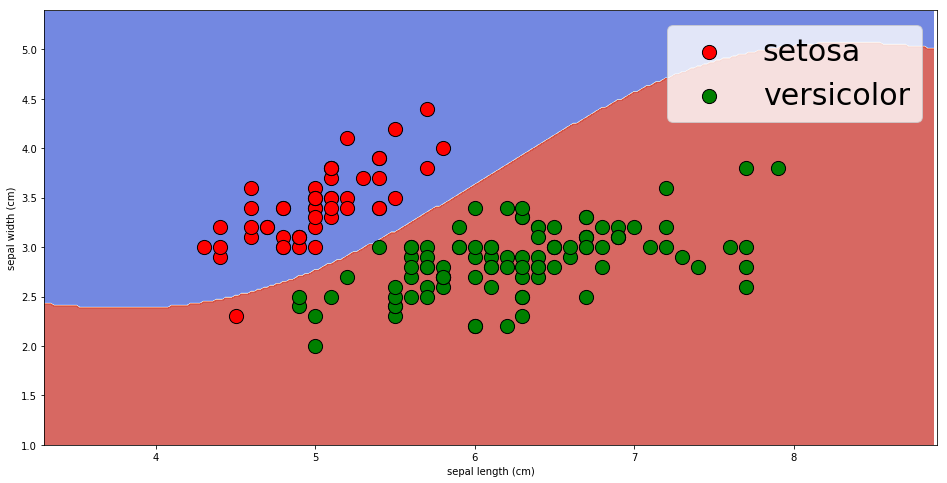

In [61]:
import numpy as np

def make_meshgrid(x, y, h=.02):
    """ Tạo lưới 2 chiều để vẽ 

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy, x_min, x_max, y_min, y_max

def plot_contours(ax, clf, xx, yy, **params):
    """ Vẽ đường các vùng ra quyết định của 1 mô hình phân lớp

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

class Logistics:
    def __init__(self):
        self.w = np.array([0,0,0,0,0])
        self.w0 = 0
        self.eta = 0.001
        self.T = 10000
        self.lda = 0.001
        
    def feature(self, X):
        ft = np.transpose( np.vstack([X[:,0], X[:,1], np.sin(X[:,0]), np.cos(X[:,1]), X[:,0]*X[:,1]]) )
        return ft
    
    def z(self, ft):
        f = np.dot(ft,self.w) + self.w0
        return f
    
    def predict(self, X):
        ft = self.feature(X)
        f = self.z(ft)
        y = 1*(f>0)
        return y
    
    def fit(self, X, y):
        # dao ham voi mau i
        # Xi ( Yi - P(Y=1|Xi,w ))
        # w -> w + eta * Xi ( Yi - P(Y=1|Xi,w ))
        # w0 -> w0 + eta * ( Yi - P(Y=1|Xi,w ))
        for i in range(self.T):
            ft = self.feature(X)
            f = self.z(ft)
            p = 1.0 / (1.0 + np.exp(-f) )
            l = np.sum( y*p + (1-y)*(1-p) )
            self.w = self.w  \
                + self.eta * np.sum( ft * np.reshape(y-p, newshape=(150,1)), axis=0 )  \
                - self.lda * self.w
            self.w0 = self.w0 + self.eta * np.sum(y-p) - self.lda * self.w0
            #print ("iter", i, "likelihood", l)
        

# Lấy giá trị min, max của các đặc trưng để vẽ hình
xx, yy, x_min, x_max, y_min, y_max = make_meshgrid(X[:,0], X[:,1])

# Lấy ra hệ tọa độ để vẽ
fig, ax = plt.subplots(figsize=(16, 8))

# Màu sắc của từng lớp đối tượng
color = ['red', 'green', 'blue']

logistics = Logistics()
logistics.fit(X, y);
print( logistics.w, logistics.w0 )
# Vẽ các vùng quyết định của mô hình (sau khi huấn luyện)
plot_contours(ax, logistics, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)

# Vẽ từng lớp trong dữ liệu
for classIndex in set(y):
    # Lọc ra các mẫu thuộc vào lớp classIndex
    mask = y==classIndex
    # Lấy tên của lớp
    name = iris.target_names[classIndex]
    # Vẽ các mẫu thuộc lớp classIndex
    ax.scatter(X[mask,0], X[mask,1], c=color[classIndex], label=name, edgecolor='k', s = 200)

# đặt các thông số của đồ thị
ax.set_xlabel(iris.feature_names[0])
ax.set_ylabel(iris.feature_names[1])
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
#ax.set_xticks(())
#ax.set_yticks(())
ax.legend(fontsize=30)

# Đưa ra màn hình
plt.show()

In [55]:
np.transpose( np.vstack([X[:,0], X[:,1], X[:,0]*X[:,0], X[:,1]*X[:,1], X[:,0]*X[:,1]]) )

array([[  5.1 ,   3.5 ,  26.01,  12.25,  17.85],
       [  4.9 ,   3.  ,  24.01,   9.  ,  14.7 ],
       [  4.7 ,   3.2 ,  22.09,  10.24,  15.04],
       [  4.6 ,   3.1 ,  21.16,   9.61,  14.26],
       [  5.  ,   3.6 ,  25.  ,  12.96,  18.  ],
       [  5.4 ,   3.9 ,  29.16,  15.21,  21.06],
       [  4.6 ,   3.4 ,  21.16,  11.56,  15.64],
       [  5.  ,   3.4 ,  25.  ,  11.56,  17.  ],
       [  4.4 ,   2.9 ,  19.36,   8.41,  12.76],
       [  4.9 ,   3.1 ,  24.01,   9.61,  15.19],
       [  5.4 ,   3.7 ,  29.16,  13.69,  19.98],
       [  4.8 ,   3.4 ,  23.04,  11.56,  16.32],
       [  4.8 ,   3.  ,  23.04,   9.  ,  14.4 ],
       [  4.3 ,   3.  ,  18.49,   9.  ,  12.9 ],
       [  5.8 ,   4.  ,  33.64,  16.  ,  23.2 ],
       [  5.7 ,   4.4 ,  32.49,  19.36,  25.08],
       [  5.4 ,   3.9 ,  29.16,  15.21,  21.06],
       [  5.1 ,   3.5 ,  26.01,  12.25,  17.85],
       [  5.7 ,   3.8 ,  32.49,  14.44,  21.66],
       [  5.1 ,   3.8 ,  26.01,  14.44,  19.38],
       [  5.4 ,   3.